In [1]:
import numpy as np
import spec_flats as sf
import matplotlib.pyplot as plt

## Initialize butler and set up observation year to find flats 

In [2]:
#repo = '/repo/embargo_old'
#repo = '/repo/embargo'
repo = '/sdf/group/rubin/repo/main'
#calibCollections=['LATISS/calib/legacy','LATISS/raw/all']
calibCollections=['LATISS/calib','LATISS/raw/all']
obs_year = 2024
filter_ = 'empty'
disperser = 'empty'

In [3]:
outdir = '/home/m/monroy/rubin-user/spec_flats/wl_dependence/outputs/'
if os.path.exists(outdir)==False:
    os.mkdir(outdir)

In [4]:
flat_dates, flat_ids, butler = sf.find_flat_dates(obs_year=obs_year,filter=filter_,disperser=disperser,repo=repo,calibCollections=calibCollections)

In [5]:
flat_dates

array([20240129, 20240131, 20240207, 20240212, 20240216, 20240219,
       20240220, 20240221, 20240222, 20240223, 20240227, 20240228,
       20240301, 20240303, 20240305, 20240306, 20240308, 20240311,
       20240326, 20240327, 20240328, 20240329, 20240401, 20240402,
       20240403, 20240404, 20240408, 20240409, 20240410, 20240415,
       20240416, 20240417, 20240419, 20240422, 20240423, 20240424,
       20240429, 20240524, 20240527, 20240528, 20240529, 20240530,
       20240603, 20240611, 20240618, 20240619, 20240624, 20240625,
       20240626, 20240627, 20240703, 20240708, 20240709, 20240716,
       20240717, 20240722, 20240723, 20240724, 20240726, 20240730,
       20240801, 20240806, 20240807, 20240812, 20240813, 20240814,
       20240819, 20240820, 20240821, 20240827, 20240902, 20240903,
       20240909, 20240910, 20240911, 20240912, 20240916, 20240917,
       20240923, 20240924, 20241002, 20241009, 20241014, 20241015])

In [6]:
#flat_ids

### Find closest date 

In [7]:
closest_date, closest_ids = sf.find_closest_date(20240417,flat_ids)

Requested observation date =  20240417
Closest date available =  20240417
Corresponding flat IDs =  [2024041700165 2024041700166 2024041700167 2024041700168 2024041700169
 2024041700170 2024041700171 2024041700172 2024041700173 2024041700174
 2024041700175 2024041700176 2024041700177 2024041700178 2024041700179
 2024041700180 2024041700181 2024041700182 2024041700183 2024041700184
 2024041700185]


### Check that the flats of a given date can be loaded 

In [8]:
sf.check_flats(closest_ids,return_flats=False,butler=butler)

Inspecting flats
All flats are equal


### Select a flat by ID and plot it 

In [9]:
#2024-04
#flat_id0 = 2024041700090 #SDSSg_65mm
#flat_id0 = 2024041700217 #SDSSr_65mm
#flat_id0 = 2024041700119 #SDSSz_65mm
flat_id0 = 2024041700177 #empty
#2024-08
#flat_id0 = 2024080700162 #SDSSg_65mm
#flat_id0 = 2024041700217 #SDSSr_65mm
#flat_id0 = 2024041700119 #SDSSz_65mm
#flat_id0 = 2025010900127 #empty

In [10]:
assert flat_id0 in closest_ids

In [11]:
flat_array_ = sf.get_flat_array(flat_id0,butler=butler)

Flat 2024041700177 properly loaded


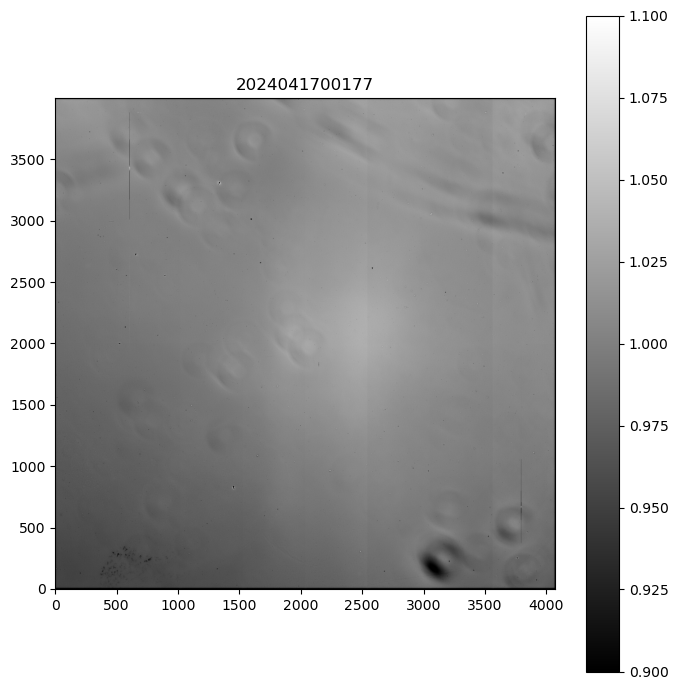

In [12]:
sf.plot_flat(flat_array_,title=flat_id0)

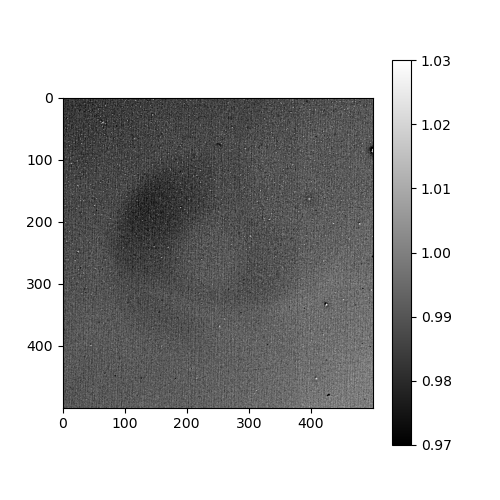

In [13]:
sub_flat = flat_array_[1000:1500,1150:1650]
%matplotlib widget
fig,axs = plt.subplots(1,1,figsize=(5,5))
im = axs.imshow(sub_flat,vmin=0.97,vmax=1.03,cmap='gray')
plt.colorbar(im,ax=axs)

In [14]:
sub_flat_norm = (sub_flat-np.min(sub_flat))/(np.max(sub_flat)-np.min(sub_flat))

In [15]:
from matplotlib.colors import LogNorm

In [16]:
np.min(sub_flat),np.max(sub_flat)

(np.float32(0.2755177), np.float32(1.4942698))

In [17]:
np.min(sub_flat_norm),np.max(sub_flat_norm)

(np.float32(0.0), np.float32(1.0))

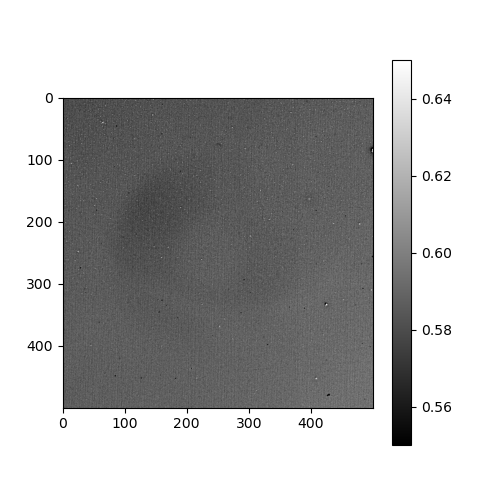

In [18]:
%matplotlib widget
fig,axs = plt.subplots(1,1,figsize=(5,5))
im = axs.imshow(sub_flat_norm,vmin=0.55,vmax=0.65,cmap='gray')
plt.colorbar(im,ax=axs)

In [19]:
%matplotlib inline

In [20]:
dft_test = np.fft.fft2(sub_flat)
#dft = np.fft.fft2(sub_flat_norm)
dft_test_shift = np.fft.fftshift(dft_test)

In [21]:
import cv2

In [22]:
magnitude = 20.*np.log(np.abs(dft_test_shift)+1)
magnitude_normalized = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

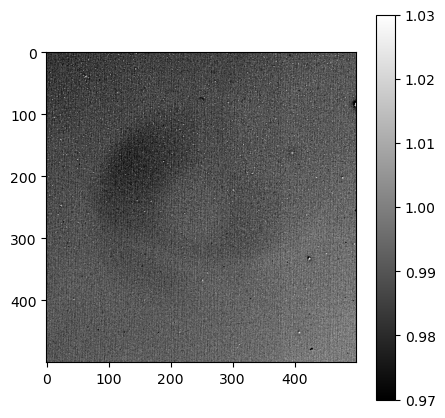

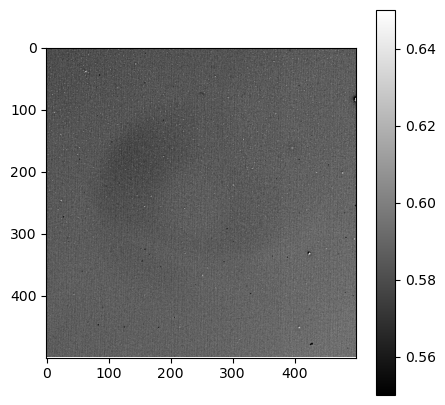

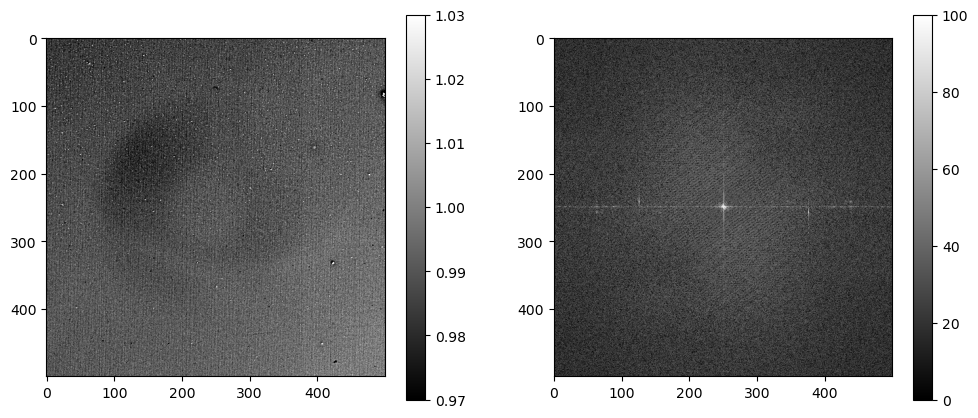

In [23]:
fig,axs = plt.subplots(1,2,figsize=(12,5))

im = axs[0].imshow(sub_flat,vmin=0.97,vmax=1.03,cmap='gray')
plt.colorbar(im,ax=axs[0])
#axs[1].imshow(np.abs(dft_shift))
im = axs[1].imshow(magnitude,vmin=0,vmax=100,cmap='gray')
plt.colorbar(im,ax=axs[1])

In [24]:
np.min(20.*np.log(np.abs(dft_test_shift))),np.max(20.*np.log(np.abs(dft_test_shift)))

(np.float32(-87.820015), np.float32(248.38486))

In [25]:
idft_test_shift = np.fft.ifftshift(dft_test_shift)
idft_test = np.fft.ifft2(idft_test_shift)
idft_test = np.abs(idft_test)

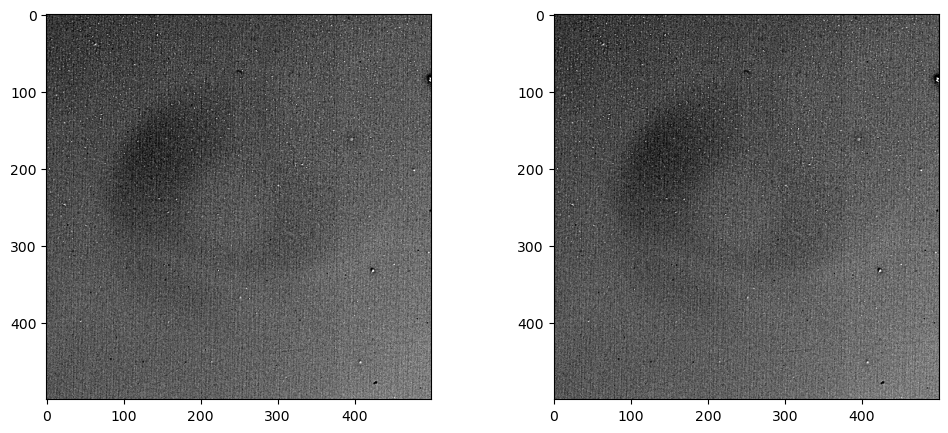

In [26]:
fig,axs = plt.subplots(1,2,figsize=(12,5))

axs[0].imshow(sub_flat,vmin=0.97,vmax=1.03,cmap='gray')
axs[1].imshow(idft_test,vmin=0.97,vmax=1.03,cmap='gray')

(array([9.50000e+01, 9.99000e+02, 5.16000e+03, 2.18980e+04, 4.48460e+04,
        1.29905e+05, 3.43600e+04, 1.01140e+04, 2.32400e+03, 2.99000e+02]),
 array([-4.76837158e-07, -4.05311596e-07, -3.33786005e-07, -2.62260414e-07,
        -1.90734852e-07, -1.19209290e-07, -4.76836988e-08,  2.38418920e-08,
         9.53674544e-08,  1.66893017e-07,  2.38418579e-07]),
 <BarContainer object of 10 artists>)

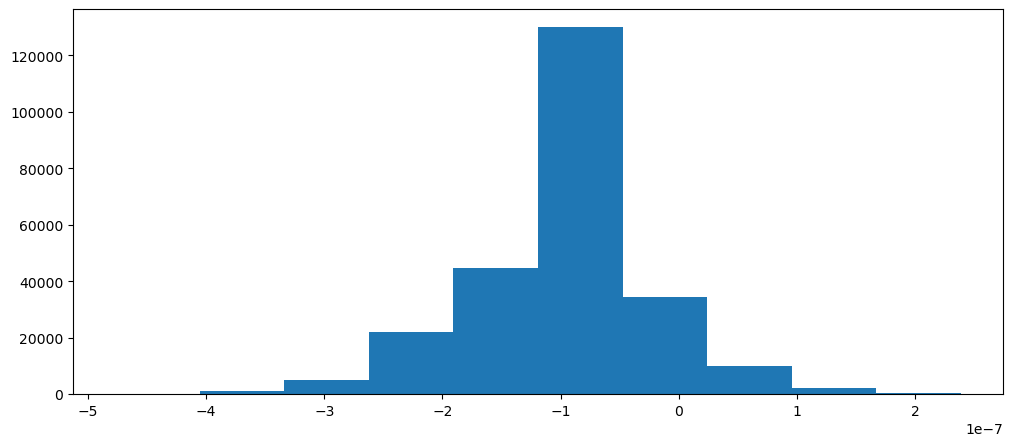

In [27]:
fig,axs = plt.subplots(1,1,figsize=(12,5))

#axs.imshow(sub_flat-idft,vmin=0.97,vmax=1.03,cmap='gray')
axs.hist(sub_flat.flatten()-idft_test.flatten())

In [28]:
sub_flat.shape

(500, 500)

In [29]:
size = 500

In [30]:
radius = 200
k_radius = size/(2.*radius)

In [31]:
x, y = np.meshgrid(np.linspace(-1*int(size/2), int(size/2), size), np.linspace(-1*int(size/2), int(size/2), size))
d = np.sqrt(x**2 + y**2)

In [32]:
# Parámetros del filtro de Butterworth
D0 =25*k_radius  # Frecuencia de corte
n_up = 3  # Orden del filtro
n_down = 2

# Máscara de Butterworth
mask_fourier_up = 1 / (1 + (D0/d)**(2 * n_up))
mask_fourier_down = 1 / (1 + (d/D0)**(2 * n_down))

mask_fourier = mask_fourier_up

mask_fourier[int(size/2),int(size/2)] = 1

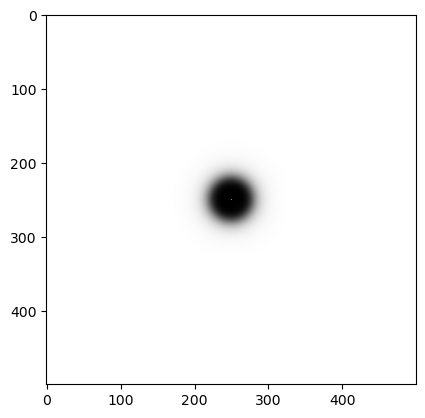

In [33]:
plt.imshow(mask_fourier,cmap='gray')

In [34]:
dft_test_shift_masked = dft_test_shift*mask_fourier

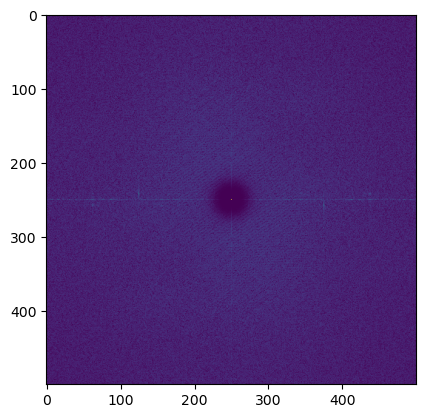

In [35]:
plt.imshow(20*np.log(np.abs(dft_test_shift_masked)+1.))

In [36]:
idft_test_shift = np.fft.ifftshift(dft_test_shift_masked)
idft_test_filter = np.abs(np.fft.ifft2(idft_test_shift))

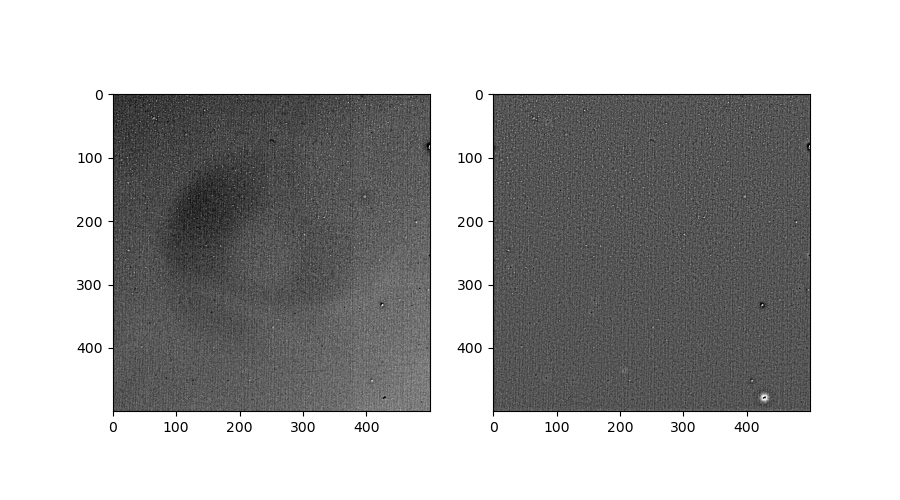

In [45]:
%matplotlib widget
fig,axs = plt.subplots(1,2,figsize=(9,5))

axs[0].imshow(sub_flat,vmin=0.97,vmax=1.03,cmap='gray')
axs[1].imshow(idft_test_filter,vmin=0.97,vmax=1.03,cmap='gray')

In [64]:
k_radius

1.25

### Gaussian filter 

In [65]:
# Parámetros del filtro gaussiano
sigma = 100*k_radius  # Desviación estándar, ajusta según sea necesario

# Máscara del filtro gaussiano de paso alto
gaussian_highpass = 1.-np.exp(-(d**2) / (2 * sigma**2))

mask_fourier_gauss = gaussian_highpass

mask_fourier_gauss[int(size/2),int(size/2)] = 1

In [66]:
%matplotlib inline

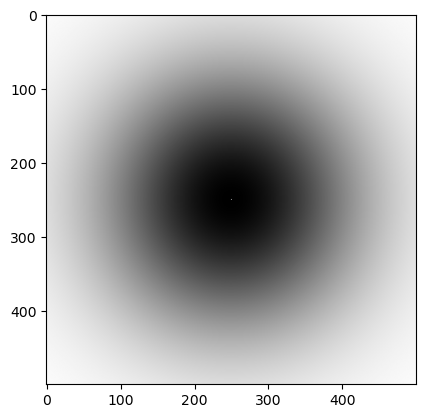

In [68]:
plt.imshow(mask_fourier_gauss,cmap='gray')
plt.show()

In [69]:
dft_test_shift_masked_gauss = dft_test_shift*mask_fourier_gauss

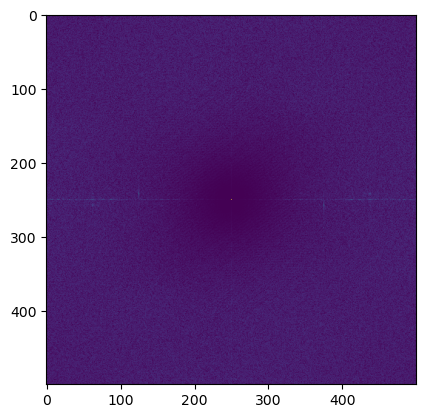

In [70]:
plt.imshow(20*np.log(np.abs(dft_test_shift_masked_gauss)+1.))

In [71]:
idft_test_shift_gauss = np.fft.ifftshift(dft_test_shift_masked_gauss)
idft_test_filter_gauss = np.abs(np.fft.ifft2(idft_test_shift_gauss))

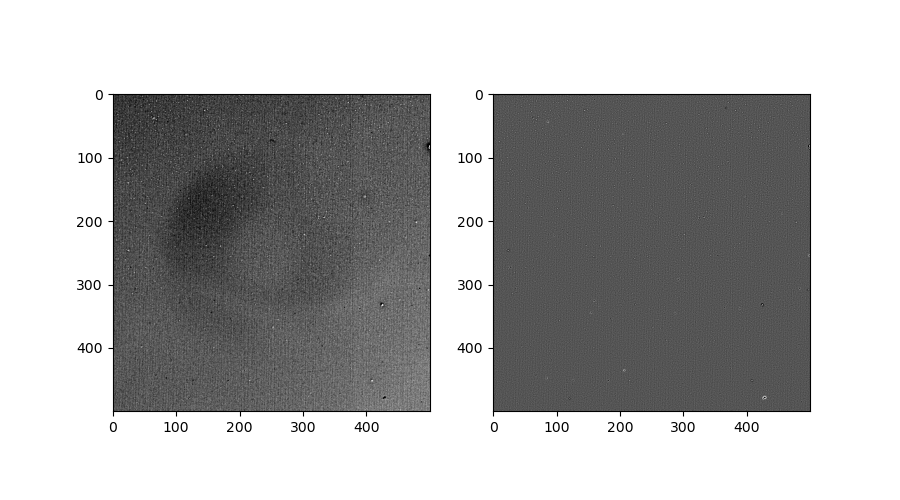

In [72]:
%matplotlib widget
fig,axs = plt.subplots(1,2,figsize=(9,5))

axs[0].imshow(sub_flat,vmin=0.97,vmax=1.03,cmap='gray')
axs[1].imshow(idft_test_filter_gauss,vmin=0.97,vmax=1.03,cmap='gray')

In [73]:
image_norm = (sub_flat - np.min(sub_flat))/(np.max(sub_flat)-np.min(sub_flat))

In [74]:
np.min(image_norm), np.max(image_norm)

(np.float32(0.0), np.float32(1.0))

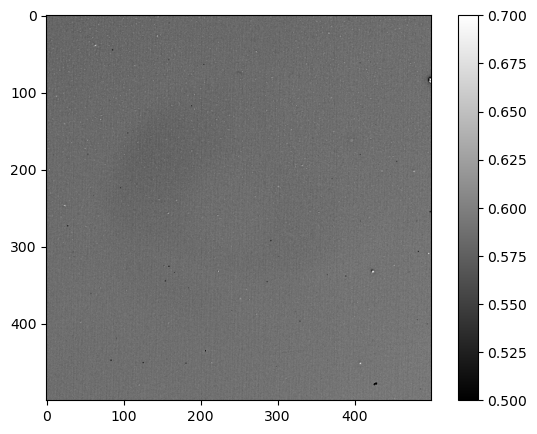

In [95]:
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(7,5))

im = ax.imshow(image_norm,vmin=0.5,vmax=0.7,cmap='gray')
plt.colorbar(im,ax=ax)

In [100]:
aa = np.clip(image_norm * 255, 0, 255).astype(np.uint8)

In [101]:
np.min(aa), np.max(aa)

(np.uint8(0), np.uint8(255))

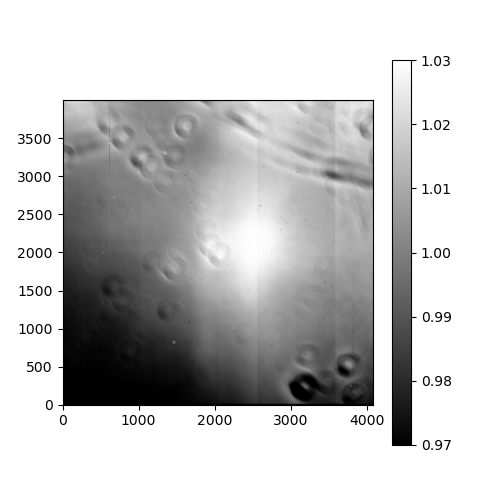

In [38]:
fig,axs = plt.subplots(1,1,figsize=(5,5))
im = axs.imshow(flat_array_,origin='lower',vmin=0.97,vmax=1.03,cmap='gray')
plt.colorbar(im,ax=axs)

In [39]:
flat_array_.shape

(4000, 4072)

In [40]:
dft = np.fft.fft2(flat_array_)
#dft = np.fft.fft2(sub_flat_norm)
dft_shift = np.fft.fftshift(dft)

In [41]:
magnitude_ = 20.*np.log10(np.abs(dft_shift)+1.)

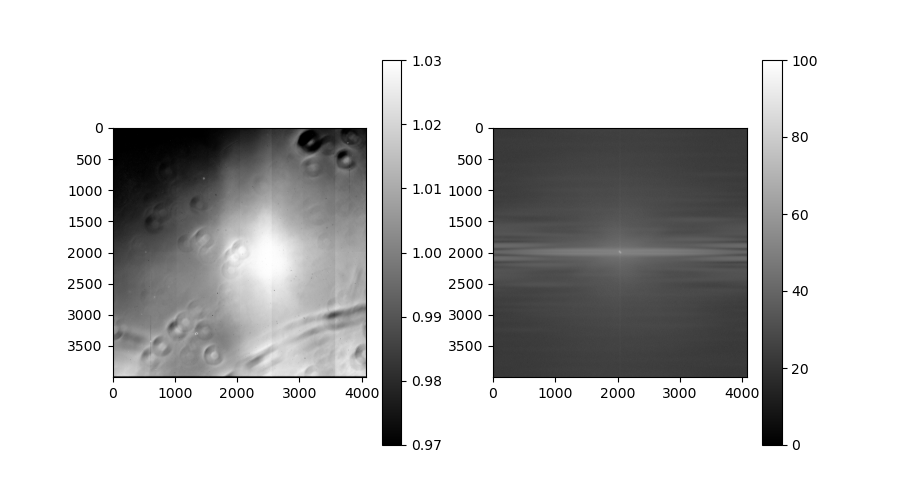

In [42]:
fig,axs = plt.subplots(1,2,figsize=(9,5))

im = axs[0].imshow(flat_array_,vmin=0.97,vmax=1.03,cmap='gray')
plt.colorbar(im,ax=axs[0])
#axs[1].imshow(np.abs(dft_shift))
im = axs[1].imshow(magnitude_,vmin=0,vmax=100,cmap='gray')
plt.colorbar(im,ax=axs[1])

In [43]:
idft_shift = np.fft.ifftshift(dft_shift)
idft = np.fft.ifft2(idft_shift)
idft = np.abs(idft)

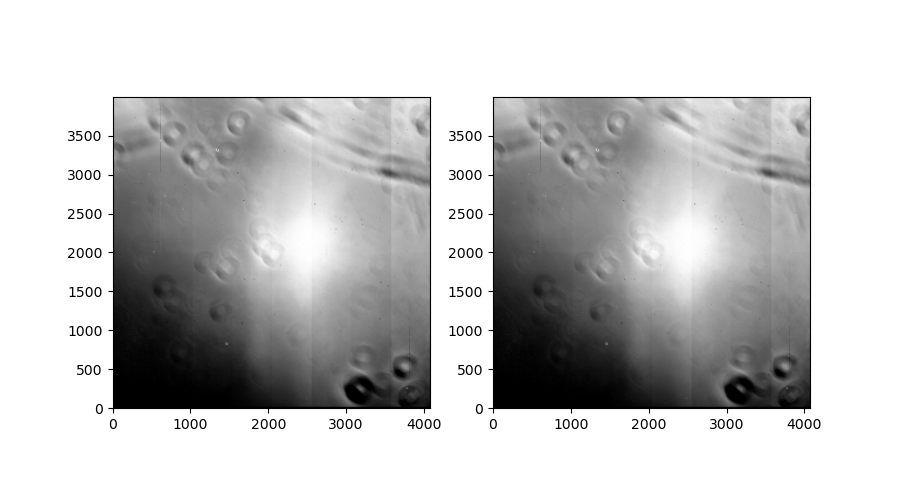

In [44]:
fig,axs = plt.subplots(1,2,figsize=(9,5))

axs[0].imshow(flat_array_,origin='lower',vmin=0.97,vmax=1.03,cmap='gray')
axs[1].imshow(idft,origin='lower',vmin=0.97,vmax=1.03,cmap='gray')

In [45]:
height, width = flat_array_.shape

# Parámetros del filtro de Butterworth
D0 = 40*k_radius  # Radio de corte en píxeles (ajusta según tus necesidades)
n = 1    # Orden del filtro (controla la suavidad de la transición)

# Crear una malla de coordenadas centrada
y, x = np.ogrid[-height//2:height//2, -width//2:width//2]
d = np.sqrt(x**2 + y**2)  # Distancia desde el centro

# Máscara de Butterworth de paso alto
butterworth_highpass = 1 / (1 + (D0 / d)**(2 * n))

/tmp/ipykernel_13913/2091113991.py:12: RuntimeWarning: divide by zero encountered in divide
  butterworth_highpass = 1 / (1 + (D0 / d)**(2 * n))


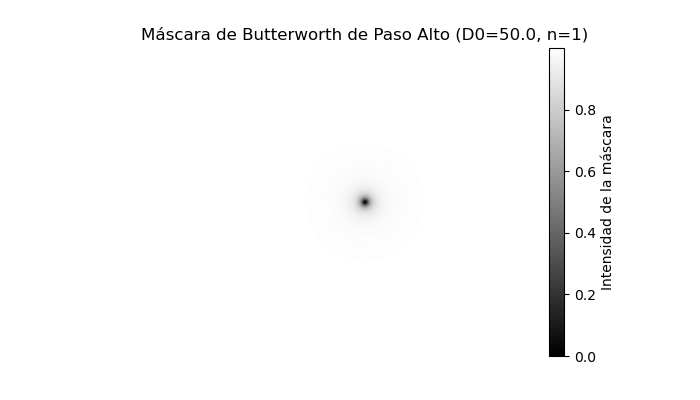

In [46]:
# Normalizar la máscara para visualización
#butterworth_highpass_normalized = (butterworth_highpass - butterworth_highpass.min()) / (butterworth_highpass.max() - butterworth_highpass.min())

# Visualizar la máscara
plt.figure(figsize=(7, 4))
plt.imshow(butterworth_highpass, cmap='gray')
plt.title(f'Máscara de Butterworth de Paso Alto (D0={D0}, n={n})')
plt.axis('off')
plt.colorbar(label='Intensidad de la máscara')
plt.show()

In [47]:
mask_fourier = butterworth_highpass

mask_fourier[int(size/2),int(size/2)] = 1

In [48]:
dft_shift_masked = dft_shift*mask_fourier
#dft_shift_masked = dft_shift*butterworth_highpass

/tmp/ipykernel_13913/3409375737.py:3: RuntimeWarning: divide by zero encountered in log10
  im = axs.imshow(20.*np.log10(np.abs(dft_shift_masked)),cmap='gray')


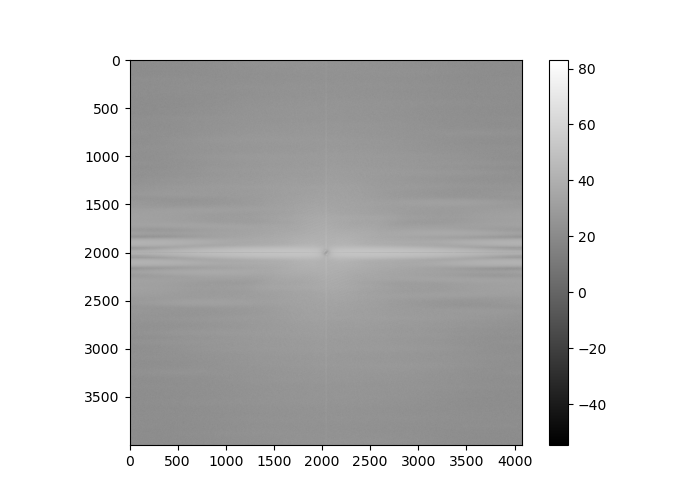

In [49]:
fig,axs = plt.subplots(1,1,figsize=(7,5))

im = axs.imshow(20.*np.log10(np.abs(dft_shift_masked)),cmap='gray')
plt.colorbar(im,ax=axs)

In [50]:
idft_shift = np.fft.ifftshift(dft_shift_masked)
idft_filter = np.abs(np.fft.ifft2(idft_shift))

In [51]:
original_mean = np.mean(flat_array_)
original_std = np.std(flat_array_)

filtered_mean = np.mean(idft_filter)
filtered_std = np.std(idft_filter)

In [52]:
idft_filter_scaled = (idft_filter - filtered_mean) * (original_std / filtered_std) + original_mean

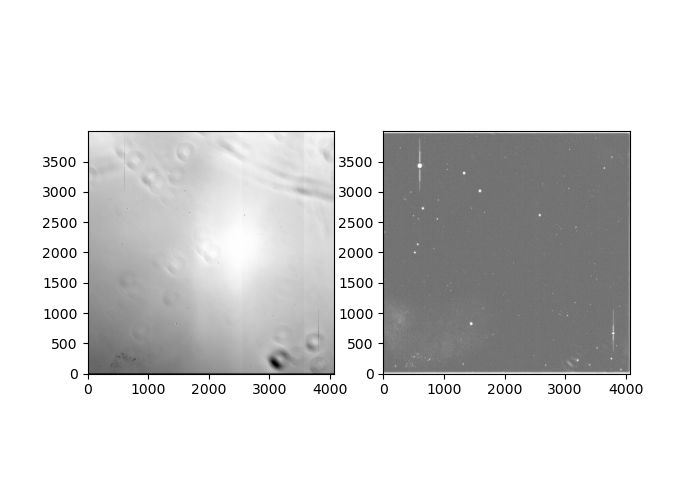

In [74]:
%matplotlib widget
fig,axs = plt.subplots(1,2,figsize=(7,5))

axs[0].imshow(flat_array_,origin='lower',vmin=0.9,vmax=1.03,cmap='gray')
axs[1].imshow(idft_filter_scaled,origin='lower',vmin=0.97,vmax=1.03,cmap='gray')

In [72]:
dft_shift_masked = dft_shift*mask_fourier

/tmp/ipykernel_13913/3409375737.py:3: RuntimeWarning: divide by zero encountered in log10
  im = axs.imshow(20.*np.log10(np.abs(dft_shift_masked)),cmap='gray')


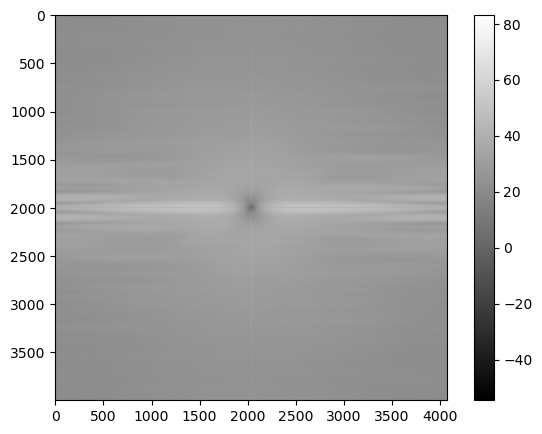

In [73]:
fig,axs = plt.subplots(1,1,figsize=(7,5))

im = axs.imshow(20.*np.log10(np.abs(dft_shift_masked)),cmap='gray')
plt.colorbar(im,ax=axs)

In [75]:
idft_shift = np.fft.ifftshift(dft_shift_masked)
idft_filter = np.abs(np.fft.ifft2(idft_shift))

In [76]:
original_mean = np.mean(flat_array_)
original_std = np.std(flat_array_)

filtered_mean = np.mean(idft_filter)
filtered_std = np.std(idft_filter)

In [77]:
idft_filter_scaled = (idft_filter - filtered_mean) * (original_std / filtered_std) + original_mean

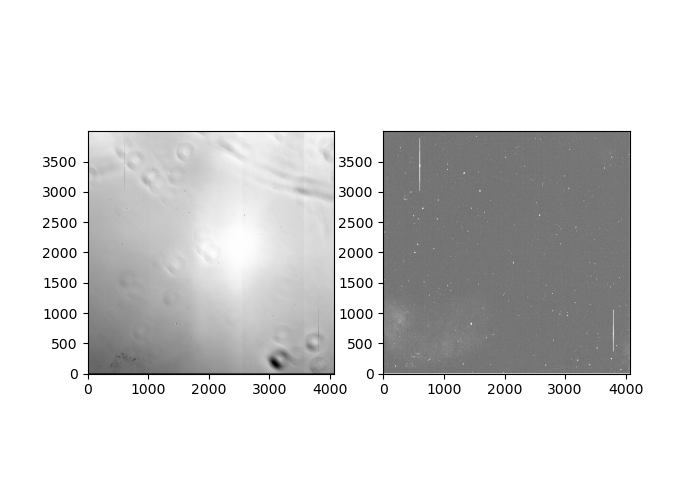

In [78]:
%matplotlib widget
fig,axs = plt.subplots(1,2,figsize=(7,5))

axs[0].imshow(flat_array_,origin='lower',vmin=0.9,vmax=1.03,cmap='gray')
axs[1].imshow(idft_filter_scaled,origin='lower',vmin=0.97,vmax=1.03,cmap='gray')

In [54]:
radius,k_radius

(200, 1.25)

In [55]:
height, width = flat_array_.shape

# Parámetros del filtro de Butterworth
D0 = 30*k_radius  # Radio de corte en píxeles (ajusta según tus necesidades)
n = 2    # Orden del filtro (controla la suavidad de la transición)

# Crear una malla de coordenadas centrada
y, x = np.ogrid[-height//2:height//2, -width//2:width//2]
d = np.sqrt(x**2 + y**2)  # Distancia desde el centro

# Máscara de Butterworth de paso alto
butterworth_highpass = 1 / (1 + (D0 / d)**(2 * n))

/tmp/ipykernel_13913/461902465.py:12: RuntimeWarning: divide by zero encountered in divide
  butterworth_highpass = 1 / (1 + (D0 / d)**(2 * n))


In [56]:
alpha = 0.2
# Espectro de Fourier de la imagen original
dft_original = np.fft.fft2(flat_array_)
dft_shift_original = np.fft.fftshift(dft_original)

# Espectro filtrado (sin dónuts)
dft_shift_filtered = dft_shift * butterworth_highpass  # Máscara de Butterworth aplicada

# Máscara para seleccionar solo frecuencias altas del espectro original
high_freq_mask = 1 - butterworth_highpass  # Inversa de la máscara de Butterworth

# Combinar espectros: frecuencias bajas del espectro filtrado + frecuencias altas del espectro original
dft_shift_combined = alpha*dft_shift_filtered * butterworth_highpass + (1.-alpha)*dft_shift_original * high_freq_mask

# Transformada inversa para obtener la imagen combinada
idft_shift_combined = np.fft.ifftshift(dft_shift_combined)
combined_image = np.abs(np.fft.ifft2(idft_shift_combined))


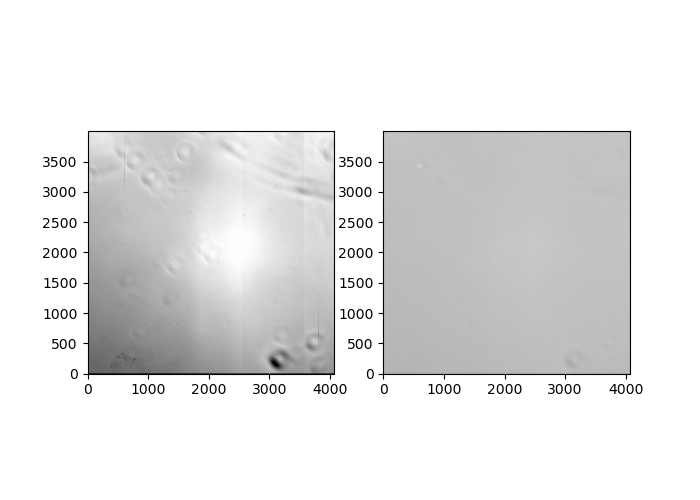

In [59]:
%matplotlib widget
fig,axs = plt.subplots(1,2,figsize=(7,5))

axs[0].imshow(flat_array_,origin='lower',vmin=0.9,vmax=1.03,cmap='gray')
axs[1].imshow(combined_image,origin='lower',vmin=0.1,vmax=1.03,cmap='gray')